In [2]:
# <!-- collapse=True -->
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# K-means

Algorithme de classification non-supervisée

* On part d'un nuage de points $\{ X_1,  X_2, ...\}$ 

* On souhaite classer les points dans k catégories
* Chaque catégorie est définie par les coordonnées d'un point "centre"
* Le point $X_i$ est classé dans la catégorie dont le centre est le plus proche
    - _Remarque:_ ceci revient à découper l'espace par un [diagrame de Voronoi](https://fr.wikipedia.org/wiki/Diagramme_de_Vorono%C3%AF)
* La question devient alors: Comment trouver les k points "centre" qui distinguent au mieux les points ?
* Une catégorie est stable si son point 'centre' est le barycentre de l'ensemble de ses points
* On procède par itérations



#### Voir
- http://sherrytowers.com/2013/10/24/k-means-clustering/
- [how-to-understand-the-drawbacks-of-k-means](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means)

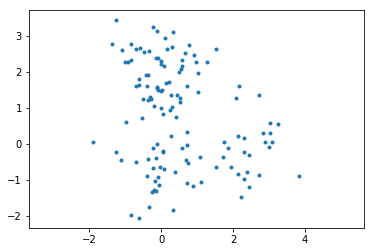

In [16]:
# data
X1 = np.random.normal(loc=0.0, scale=.6, size=60)
Y1 = np.random.normal(loc=2.0, scale= 0.6, size=60)

X2 = np.random.normal(loc=0.0, scale=.6, size=40)
Y2 = np.random.normal(loc=-.5, scale= 0.8, size=40)

X3 = np.random.normal(loc=2.5, scale=.4, size=25)
Y3 = np.random.normal(loc=0.0, scale= 0.7, size=25)

X = np.concatenate((X1, X2, X3))
Y = np.concatenate((Y1, Y2, Y3))

plt.plot(X, Y, '.')
plt.axis('equal');

### Une itération :

In [52]:
def iteration( xy_bary ):
    # Tri
    cat = []
    for x, y in zip(X, Y):
        d = []
        for xy0 in xy_bary:
            distance = (x-xy0[0])**2 + (y-xy0[1])**2
            d.append( distance ) 
        i = np.argmin(d)
        cat.append(i)

    cat = np.array(cat)

    # Calcul nouveau barycentre
    for i in range( len(xy_bary) ):
        x0 = np.mean( X[ cat == i ] )
        y0 = np.mean( Y[ cat == i ] )
        xy_bary[i] = [x0, y0]
    
    return xy_bary, cat


def plot_cats( xy_bary, cat ):
    # Plot
    for i in range( len(xy_bary) ):
        plt.plot( X[ cat == i ], Y[ cat == i ], '.' )   
        
    for x0, y0 in xy_bary:
        plt.plot( x0, y0, 'kx' )

### Choix des points initiaux, arbitraire

In [53]:
xy_bary = [ [np.min(X), np.min(Y)], [np.max(X), np.max(Y)], [0, 0] ]

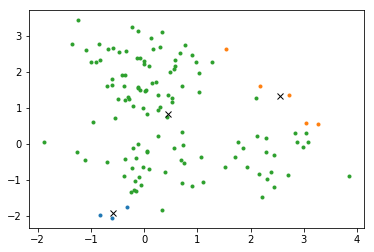

In [54]:
xy_bary, cats = iteration( xy_bary )

plot_cats( xy_bary, cats )

### N itérations

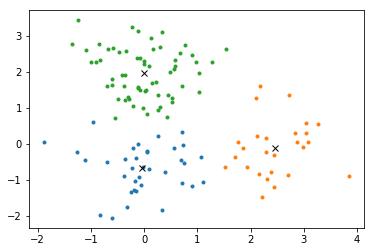

In [56]:
xy_bary = [ [np.min(X), np.min(Y)], [np.max(X), np.max(Y)], [0, 0] ]

for i in range( 20 ):
    xy_bary, cats = iteration( xy_bary )
    

plot_cats( xy_bary, cats )

## K-Means++

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://en.wikipedia.org/wiki/K-means%2B%2B